In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

In [2]:
img = cv2.imread('corn.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

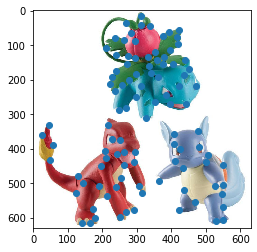

In [3]:
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
points = cv2.goodFeaturesToTrack(img2, 100,0.05,20)
s_point = points[:,0]
plt.scatter(points[:,0][:,0],points[:,0][:,1])
plt.imshow(img) 

In [4]:
def k_means_clustering(s_point,k,max_iterations=10):
        d_arr = np.random.choice(len(s_point), k)
        centroids = s_point[d_arr, :]
        dist = np.argmin(distance.cdist(s_point, centroids, 'euclidean'),axis=1)
        for _ in range(max_iterations):
            centroids = np.vstack([s_point[dist==i,:].mean(axis=0) for i in range(k)])
            tmp = np.argmin(distance.cdist(s_point, centroids, 'euclidean'),axis=1)
            dist = tmp
        return dist

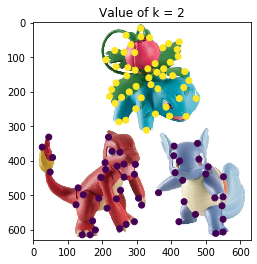

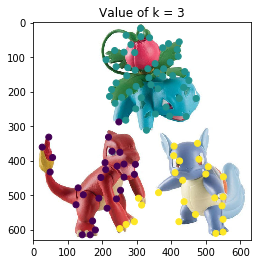

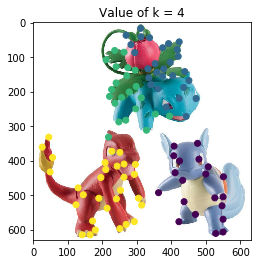

<Figure size 432x288 with 0 Axes>

In [5]:
for k in range(2,5):
    P = k_means_clustering(s_point,k)
    imr = plt.imshow(img)
    plt.scatter(s_point[:,0],s_point[:,1],c=P)
    plt.title("Value of k = {}".format(k))
    plt.show()
    plt.clf()

In [6]:
k = 3
P = k_means_clustering(s_point,k)
rikk = list(zip(P,s_point))

First_x = []
Seco_x = []
Third_x = []

First_y = []
Seco_y = []
Third_y = []

for i,j in rikk:
    if i == 0:
        First_x.append(j[0])
        First_y.append(j[1])
    elif i == 1 :
        Seco_x.append(j[0])
        Seco_y.append(j[1])
    elif i == 2 :
        Third_x.append(j[0])  
        Third_y.append(j[1])  

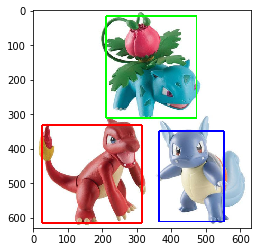

In [7]:
square = cv2.rectangle(img,((int(max(First_x))),(int(max(First_y)))),((int(min(First_x))),(int(min(First_y)))),(255,0,0),3)
square = cv2.rectangle(img,((int(max(Seco_x))),(int(max(Seco_y)))),((int(min(Seco_x))),(int(min(Seco_y)))),(0,255,0),3)
square = cv2.rectangle(img,((int(max(Third_x))),(int(max(Third_y)))),((int(min(Third_x))),(int(min(Third_y)))),(0,0,255),3)
plt.imshow(square)
plt.show()